In [2]:
## Importing the MNIST Dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)  # Loads the dataset and splits it into training (60,000 images) and testing (10,000 images)

2025-05-19 11:05:20.236075: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-19 11:05:20.258895: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 11:05:20.567618: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-19 11:05:20.671705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747652720.971524    2805 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747652721.08

(60000, 28, 28) (10000, 28, 28)


In [3]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
## Displays the Shapes of the Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (60000, 28, 28), Test set shape: (10000, 28, 28)


In [5]:
## Data Preporocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0 # Converts the Integers to Floats

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1) # Reshapes the Input data for CNN

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10) # One-hot Encodes the Labels


In [6]:
## Split the data into training (54,000 images) and validation (6,000 images)
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.1, random_state=36)

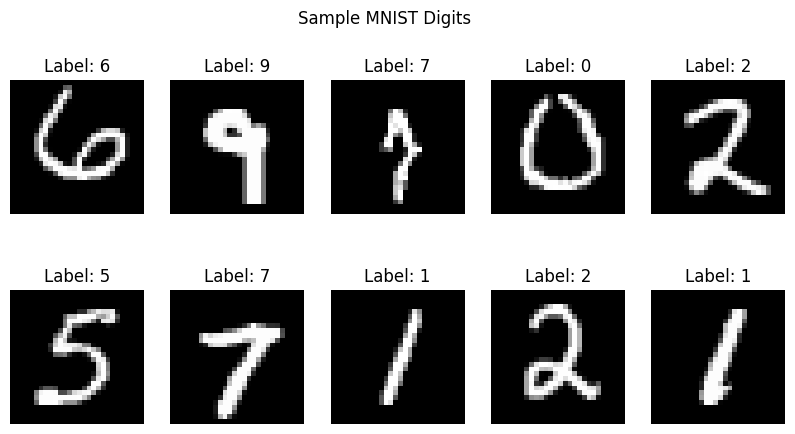

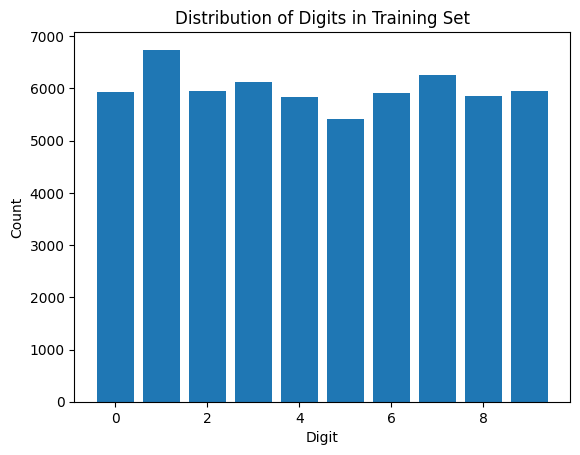

In [7]:
## EDA
#Display the first ten images from dataset in greyscale 28x28
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_cat[i])}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

# Plot bar chart displaying dataset balance
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [8]:
## Building the first model
model_1 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_data=(X_val, y_val_cat))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-19 11:05:28.819376: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8731 - loss: 0.4603 - val_accuracy: 0.9727 - val_loss: 0.0961
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9778 - loss: 0.0759 - val_accuracy: 0.9800 - val_loss: 0.0658
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9857 - loss: 0.0490 - val_accuracy: 0.9803 - val_loss: 0.0609
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9905 - loss: 0.0336 - val_accuracy: 0.9847 - val_loss: 0.0528
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9925 - loss: 0.0259 - val_accuracy: 0.9832 - val_loss: 0.0544


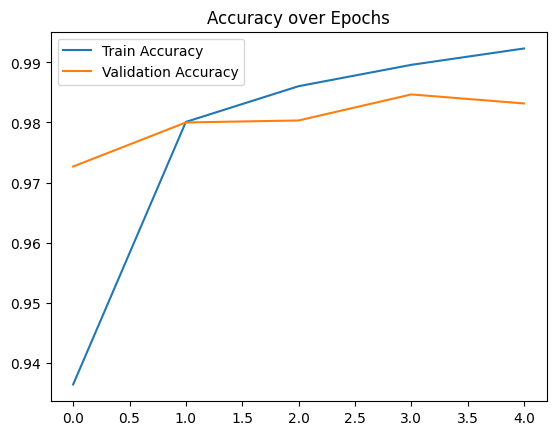

In [9]:
## Plotting the training curve of the first model
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

In [10]:
## Building the second model
model_2 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7808 - loss: 0.6843 - val_accuracy: 0.9748 - val_loss: 0.0756
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9695 - loss: 0.1054 - val_accuracy: 0.9798 - val_loss: 0.0588
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9786 - loss: 0.0747 - val_accuracy: 0.9863 - val_loss: 0.0436
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9822 - loss: 0.0581 - val_accuracy: 0.9885 - val_loss: 0.0362
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.9851 - loss: 0.0518 - val_accuracy: 0.9883 - val_loss: 0.0378
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9872 - loss: 0.0429 - val_accuracy: 0.9892 - val_loss: 0.0343
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9876 - loss: 0.0399 - val_accuracy: 0.9910 - val_loss: 0.0330
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9902 - loss: 0.0309 - 

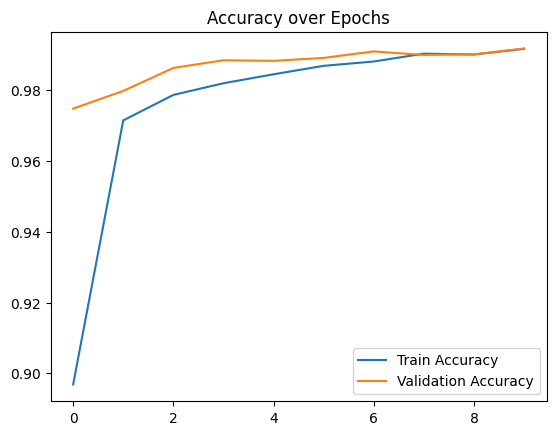

In [11]:
## Plotting the training curve of the second model
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

In [12]:
## Building the third model
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train_cat, epochs=12, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.8773 - loss: 0.4339 - val_accuracy: 0.9410 - val_loss: 0.1813
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9768 - loss: 0.0772 - val_accuracy: 0.9847 - val_loss: 0.0496
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9829 - loss: 0.0573 - val_accuracy: 0.9890 - val_loss: 0.0379
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.9867 - loss: 0.0450 - val_accuracy: 0.9893 - val_loss: 0.0390
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9905 - val_loss: 0.0319
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9893 - val_loss: 0.0404
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9900 - val_loss: 0.0341
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 65ms/step - accuracy: 0.9927 - loss: 0.0228 - 

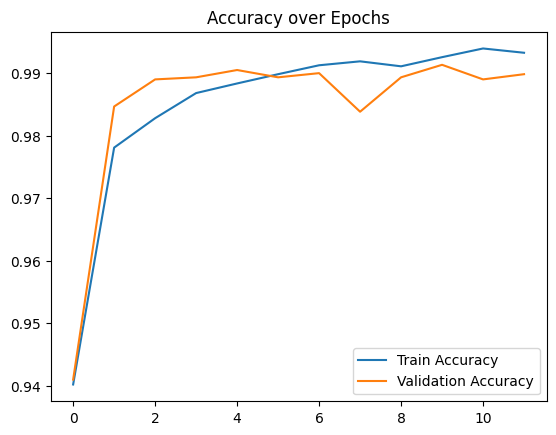

In [13]:
## Plotting the training curve of the third model
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


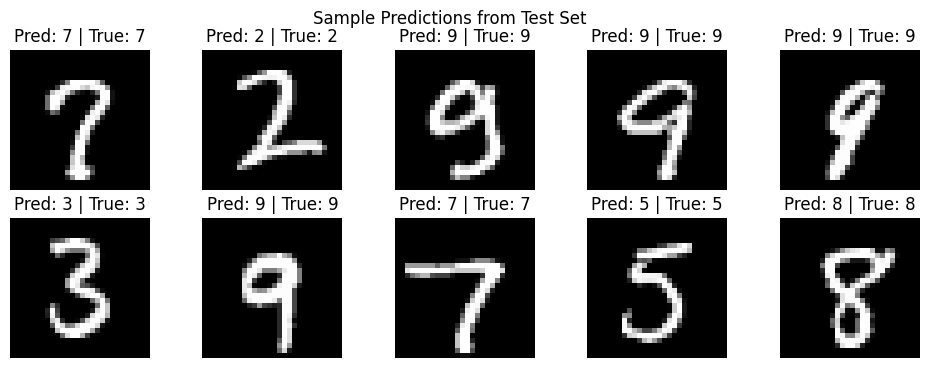

In [14]:
## Predictions for unseen data
# Generate predictions for the test set
y_pred = model_3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Visualise predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    idx = np.random.randint(0, X_test.shape[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[idx]} | True: {y_test[idx]}")
    plt.axis('off')
plt.suptitle("Sample Predictions from Test Set")
plt.show()

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:



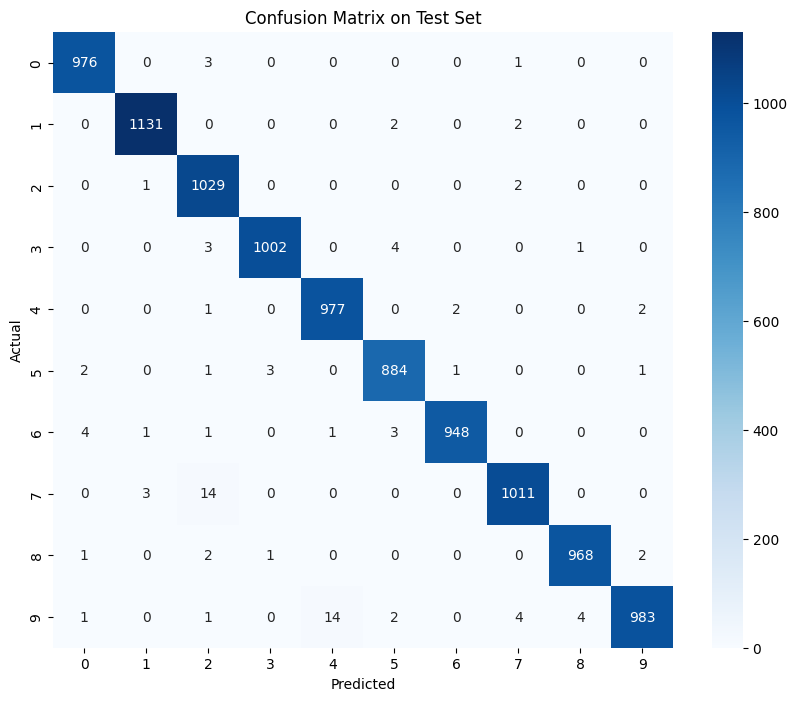

In [15]:
## Performance evaluation using classification metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes))

print("Confusion Matrix:\n")
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')
plt.show()